<h2 style="text-align:center; color: orange">⌞Data pre-processing⌝</h2>

<h4 style="text-decoration:underline">1. Generate descriptive statistics.</h4>

In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [16]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the columns
cols = df.columns.to_list()


In [17]:
# numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


# categorical columns
str_cols = ['customerID', 'SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

print("\n" + "="*45)
print(f"{' NUMERICAL COLUMNS ':=^45}")
print(df[num_cols].dtypes)

print("\n" + "="*45)
print(f"{' CATEGORICAL COLUMNS ':=^45}")
print(df[str_cols].dtypes)
print("\n" + "="*45)


============= NUMERICAL COLUMNS =============
tenure              int64
MonthlyCharges    float64
TotalCharges       object
dtype: object

============ CATEGORICAL COLUMNS ============
customerID          object
SeniorCitizen        int64
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object



In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#to verify float
print('TotalCharges type :',df['TotalCharges'].dtypes)

df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

#to verify string
print('SeniorCitizen type :',df['SeniorCitizen'].dtypes)

TotalCharges type : float64
SeniorCitizen type : object


In [19]:
print("\n" + "="*45)
print(f"{' NUMERICAL COLUMNS ':=^45}")
print(df[num_cols].dtypes)

print("\n" + "="*45)
print(f"{' CATEGORICAL COLUMNS ':=^45}")
print(df[str_cols].dtypes)
print("\n" + "="*45)


============= NUMERICAL COLUMNS =============
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

============ CATEGORICAL COLUMNS ============
customerID          object
SeniorCitizen       object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object



In [20]:
# --- 1. Numerical Statistics ---
print("\n" + "="*75)
print(f"{' NUMERICAL STATISTICS ':=^75}")
print("="*75)

if num_cols:
    # We transpose (.T) the describe result so variables are rows.
    # This fits better in a vertical terminal window.
    num_stats = df[num_cols].describe().T
    
    # Optional: Add Median explicitly if you prefer it over '50%'
    num_stats['median'] = df[num_cols].median()
    
    # Reorder columns to put median next to mean
    cols_order = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']
    # Filter to ensure we only use columns that exist
    cols_order = [c for c in cols_order if c in num_stats.columns]
    
    print(num_stats[cols_order].round(2))
else:
    print("No numerical columns found.")

print("\n" + "="*75)




========================== NUMERICAL STATISTICS ===========================
                 count     mean   median      std    min     25%      50%  \
tenure          7043.0    32.37    29.00    24.56   0.00    9.00    29.00   
MonthlyCharges  7043.0    64.76    70.35    30.09  18.25   35.50    70.35   
TotalCharges    7032.0  2283.30  1397.48  2266.77  18.80  401.45  1397.48   

                    75%      max  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3794.74  8684.80  



In [21]:
# --- 2. Categorical (Mode) Statistics ---
print("\n" + "="*70)
print(f"{' CATEGORICAL ANALYSIS ':=^70}")
print("="*70)

if str_cols:
    # Create a custom DataFrame to hold the summary
    cat_stats = pd.DataFrame(index=str_cols, columns=['Mode', 'Unique_Count', 'Top_Freq', '%_Dominance'])
    
    for col in str_cols:
        # Get the mode (handling cases with multiple modes by taking the first one)
        modes = df[col].mode()
        mode_val = modes.iloc[0] if not modes.empty else "N/A"
        
        # Get basic counts
        unique_count = df[col].nunique()
        total_count = df[col].count()
        
        # Get frequency of the most common value
        try:
            top_freq = df[col].value_counts().iloc[0]
            dominance = (top_freq / total_count) * 100 if total_count > 0 else 0
        except IndexError:
            top_freq = 0
            dominance = 0
            
        cat_stats.loc[col] = [mode_val, unique_count, top_freq, f"{dominance:.1f}%"]
    
    print(cat_stats)
else:
    print("No categorical columns found.")

print("\n" + "="*70)


======================== CATEGORICAL ANALYSIS ========================
                              Mode Unique_Count Top_Freq %_Dominance
customerID              0002-ORFBO         7043        1        0.0%
SeniorCitizen                    0            2     5901       83.8%
gender                        Male            2     3555       50.5%
Partner                         No            2     3641       51.7%
Dependents                      No            2     4933       70.0%
PhoneService                   Yes            2     6361       90.3%
MultipleLines                   No            3     3390       48.1%
InternetService        Fiber optic            3     3096       44.0%
OnlineSecurity                  No            3     3498       49.7%
OnlineBackup                    No            3     3088       43.8%
DeviceProtection                No            3     3095       43.9%
TechSupport                     No            3     3473       49.3%
StreamingTV                    

<h4 style="text-decoration:underline">1. Visualize churn distribution.</h4>

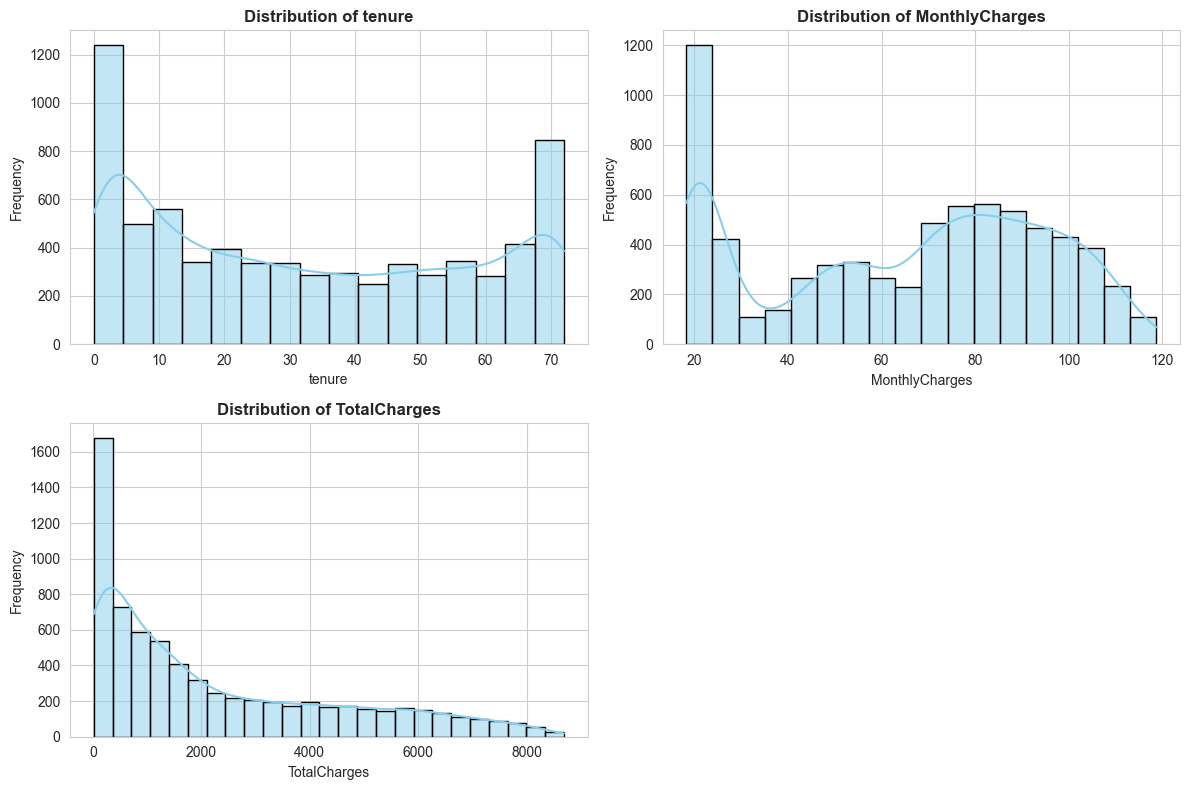

In [22]:
# visualize the numerical columns

# Settings for a clean look
sns.set_style("whitegrid")

# Calculate grid size for subplots
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(num_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    # Plot histogram with KDE
    sns.histplot(df[col], kde=True, ax=ax, color='skyblue', edgecolor='black')
    
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [23]:
str_cols[-1]

'Churn'

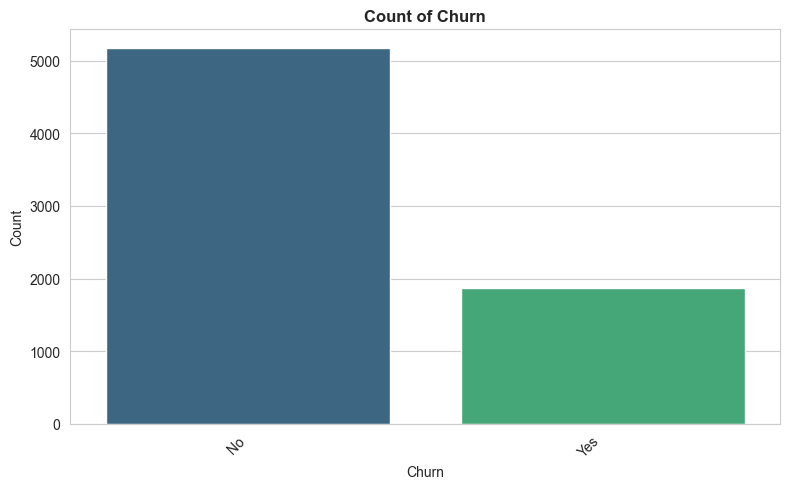

In [24]:
# Calculate grid size for subplots
n_cols = 2
n_rows = 1

plt.figure(figsize=(8, 5))

col = 'Churn'
ax = plt.subplot(1, 1, 1)

order = df[col].value_counts().index

sns.countplot(
    data=df,
    x=col,
    hue=col,
    legend=False,
    order=order,
    ax=ax,
    palette='viridis'
)

ax.set_title(f'Count of {col}', fontsize=12, fontweight='bold')
ax.set_xlabel(col)
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<h4 style="text-decoration:underline">3.Churn Correlation Heatmap
.</h4>

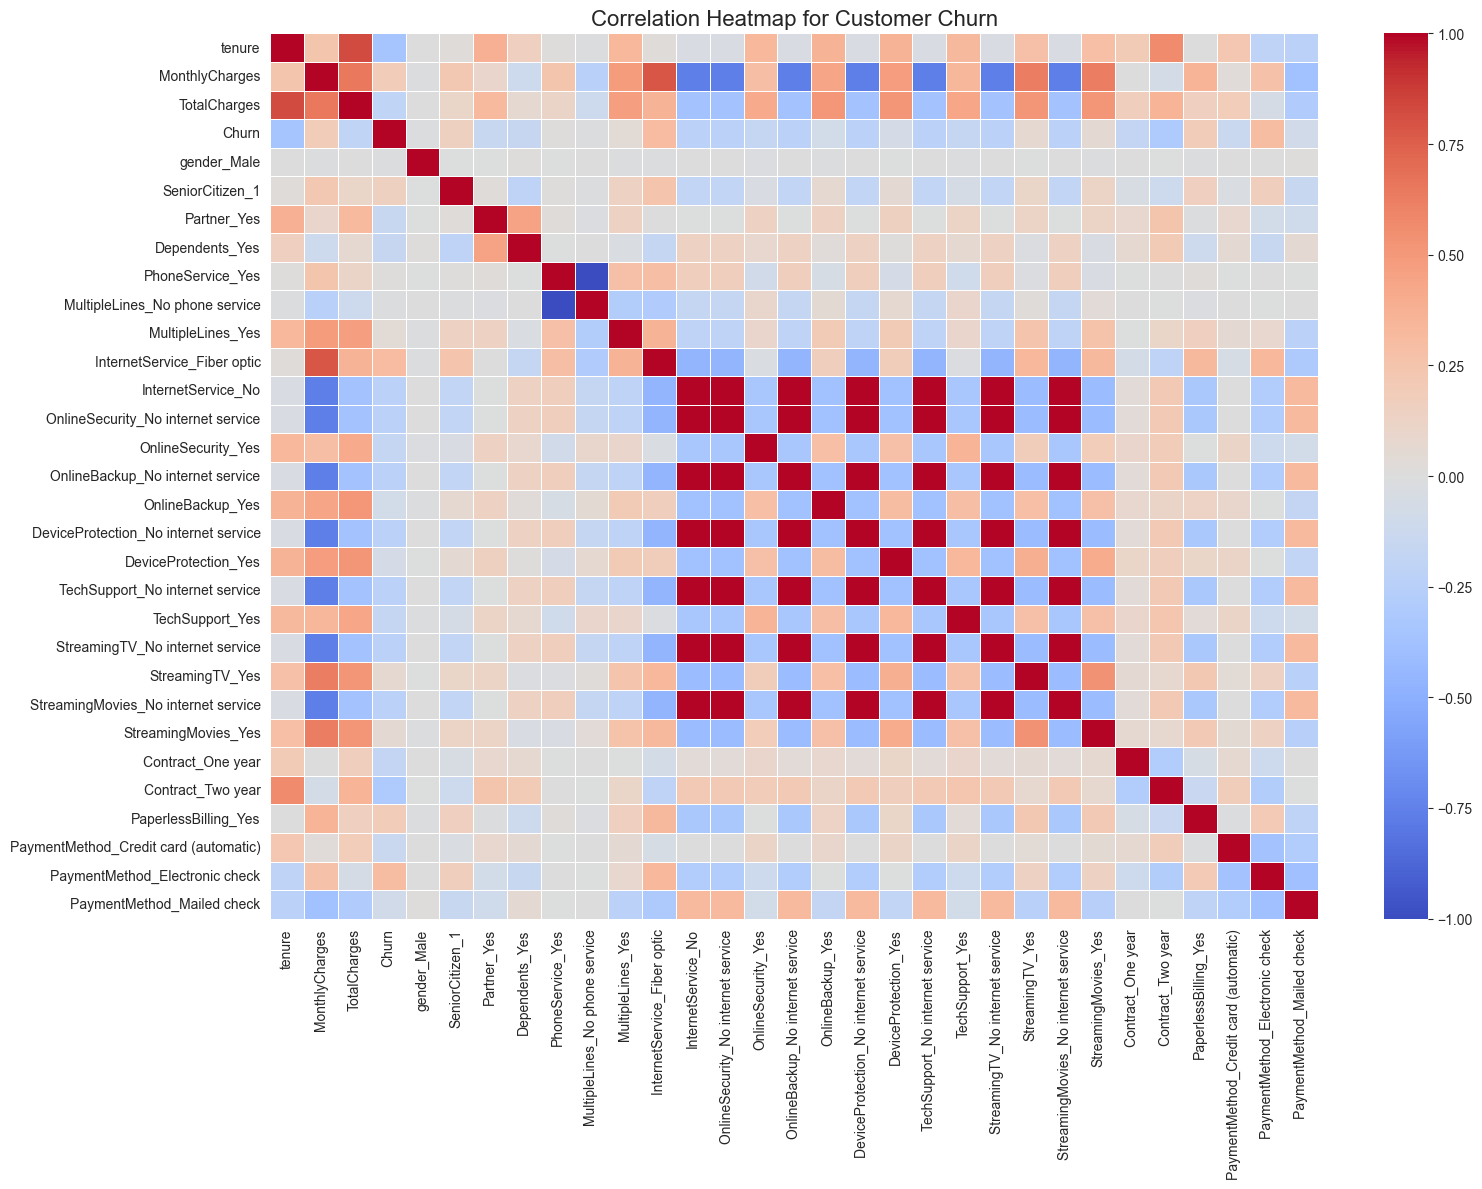


Correlation with Churn:

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen_1                          0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes      

In [25]:
# ================================
# Churn Correlation Heatmap
# ================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------
# 1. Load dataset
# ----------------
# CHANGE THIS PATH to your dataset location
#DATASET_PATH = "WA_Fn-UseC_-Telco-Customer-Churn.csv"   # example: r"C:\Users\You\Desktop\telco.csv"

#df = pd.read_csv(DATASET_PATH)

# ----------------
# 2. Basic cleaning
# ----------------
# Convert TotalCharges to numeric (sometimes loaded as string)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing values (small dataset safety)
df = df.dropna()

# ----------------
# 3. Encode target
# ----------------
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Drop customerID (identifier, not useful for correlation)
df = df.drop(columns=["customerID"])

# ----------------
# 4. Encode categorical variables
# ----------------
df_encoded = pd.get_dummies(df, drop_first=True)

# ----------------
# 5. Correlation matrix
# ----------------
corr_matrix = df_encoded.corr()

# ----------------
# 6. Heatmap
# ----------------
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap for Customer Churn", fontsize=16)
plt.tight_layout()
plt.show()

# ----------------
# 7. Churn correlations only
# ----------------
churn_corr = corr_matrix["Churn"].sort_values(ascending=False)
print("\nCorrelation with Churn:\n")
print(churn_corr)


<h4 style="text-decoration:underline">4.Impute missing values (using mean/median) or drop rows with critical missing info.</h4>


In [26]:
# ------------------------
# Impute missing values
# ------------------------
# Check missing values first
print("Missing values per column:\n")
print(df.isnull().sum())

# For numeric columns, we can fill with median (robust to outliers)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# For categorical columns, we can fill with mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Optional: If there are still rows with critical missing info, drop them
df = df.dropna()

# Verify no missing values remain
print("\nAfter imputation, missing values per column:\n")
print(df.isnull().sum())


Missing values per column:

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

After imputation, missing values per column:

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<h4 style="text-decoration:underline">5.Remove outliers that might skew the model.</h4>


In [27]:
print("\nOutlier detection using IQR method (continuous variables only):\n")

continuous_cols = ['tenure', 'MonthlyCharges']

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

# Handle outliers using Winsorization
for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


print("\nAfter handling outliers:\n")

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    remaining_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(remaining_outliers)} outliers remaining")




Outlier detection using IQR method (continuous variables only):

tenure: 0 outliers
MonthlyCharges: 0 outliers

After handling outliers:

tenure: 0 outliers remaining
MonthlyCharges: 0 outliers remaining


<h4 style="text-decoration:underline">6.Scale numerical features using StandardScaler or MinMaxScaler..</h4>


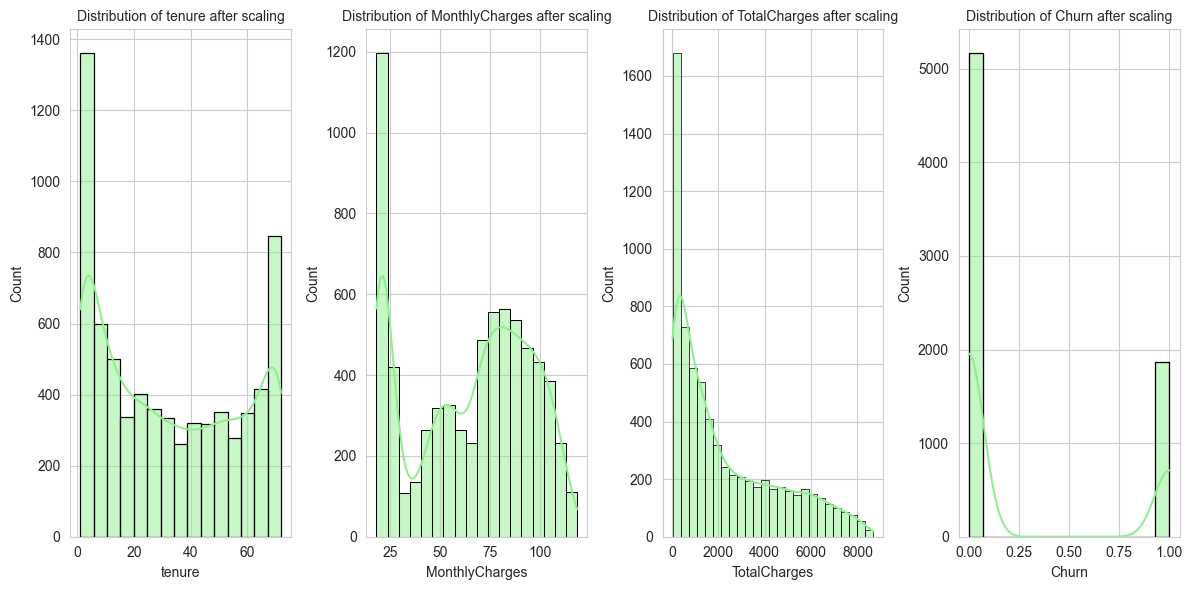


After scaling, summary statistics of numerical features:

                 count      mean       std  min       25%       50%       75%  \
tenure          7032.0  0.442560  0.345708  0.0  0.112676  0.394366  0.760563   
MonthlyCharges  7032.0  0.463166  0.299363  0.0  0.172512  0.518408  0.712562   
TotalCharges    7032.0  0.261309  0.261571  0.0  0.044155  0.159090  0.435719   
Churn           7032.0  0.265785  0.441782  0.0  0.000000  0.000000  1.000000   

                max  
tenure          1.0  
MonthlyCharges  1.0  
TotalCharges    1.0  
Churn           1.0  


In [28]:
#Scale numerical features using StandardScaler or MinMaxScaler and choose the one that best suits the data distribution and model requirements.

#how to choose between StandardScaler and MinMaxScaler?
# The choice between StandardScaler and MinMaxScaler depends on the data distribution and the requirements of the machine learning model you plan to use.
# StandardScaler is generally preferred when the data follows a normal distribution or when the model assumes that the features are normally distributed (e.g., linear regression, logistic regression, SVM). It centers the data around zero and scales it to have a standard deviation of one.
# MinMaxScaler is useful when the data does not follow a normal distribution or when you want to preserve the original distribution of the data. It scales the data to a specified range (default is 0 to 1) and is often used when the model does not assume any specific distribution (e.g., neural networks, tree-based models).

#cheking the distribution of numerical features before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(df[col], kde=True, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {col} after scaling', fontsize=10)
plt.tight_layout()
plt.show()

# since the numerical features do not follow a normal distribution, we will use MinMaxScaler to scale the features to a range of 0 to 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
# Verify scaling
print("\nAfter scaling, summary statistics of numerical features:\n")
print(df[numeric_cols].describe().T)


<h4 style="text-decoration:underline">7. Feature Creation</h4>


In [29]:
# --- ÉTAPE DE SÉCURITÉ : Conversion des types ---

# 1. Convertir TotalCharges en numérique (les erreurs deviennent des NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# 2. Remplir les éventuelles valeurs vides (NaN) par 0 pour éviter d'autres erreurs
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# --- REPRISE DE LA FEATURE CREATION ---

# 1. Score de services (Somme des 'Yes')
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

df['TotalServicesEngaged'] = (df[services] == 'Yes').sum(axis=1)

# 2. Ratio des charges (Maintenant ça va marcher !)
# On utilise + 0.01 pour éviter la division par zéro
df['Monthly_to_Total_Ratio'] = df['MonthlyCharges'] / (df['TotalCharges'] + 0.01)

# 3. Type de contrat (Binaire)
df['Is_MonthToMonth'] = (df['Contract'] == 'Month-to-month').astype(int)

# 4. Mode de paiement (Automatique ou non)
automatic_list = ['Bank transfer (automatic)', 'Credit card (automatic)']
df['Is_AutomaticPayment'] = df['PaymentMethod'].isin(automatic_list).astype(int)

print("Succès ! Les nouvelles colonnes ont été créées sans erreur.")
print(df[['TotalCharges', 'TotalServicesEngaged', 'Monthly_to_Total_Ratio']].head())

Succès ! Les nouvelles colonnes ont été créées sans erreur.
   TotalCharges  TotalServicesEngaged  Monthly_to_Total_Ratio
0      0.001275                     1               10.236974
1      0.215867                     2                1.704876
2      0.010310                     2               17.440755
3      0.210241                     3                1.086552
4      0.015330                     0               20.603633


In [30]:

# Application du One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Colonnes après One-Hot Encoding :")
print(df_encoded.head())

Colonnes après One-Hot Encoding :
     tenure  MonthlyCharges  TotalCharges  Churn  TotalServicesEngaged  \
0  0.000000        0.115423      0.001275    0.0                     1   
1  0.464789        0.385075      0.215867    0.0                     2   
2  0.014085        0.354229      0.010310    1.0                     2   
3  0.619718        0.239303      0.210241    0.0                     3   
4  0.014085        0.521891      0.015330    1.0                     0   

   Monthly_to_Total_Ratio  Is_MonthToMonth  Is_AutomaticPayment  gender_Male  \
0               10.236974                1                    0        False   
1                1.704876                0                    0         True   
2               17.440755                1                    0         True   
3                1.086552                0                    1         True   
4               20.603633                1                    0        False   

   SeniorCitizen_1  ...  StreamingTV_No 

In [31]:
# 1. On retire l'ID client (on ignore l'erreur s'il est déjà parti)
df_final = df_encoded.drop(columns=['customerID'], errors='ignore')

# 2. On transforme le Churn en 0 et 1
# Note : Si votre collègue a déjà transformé le Churn avant, le .map renverra des NaN. 
# On ajoute donc une sécurité.
if df_final['Churn'].dtype == 'object':
    df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})

# 3. Conversion de tout le tableau en nombres (0/1 au lieu de True/False)
df_final = df_final.astype(float)

print("--- ETAT FINAL POUR LE SPRINT 1 ---")
print(f"Nombre de colonnes : {len(df_final.columns)}")
# Affichage sécurisé des colonnes créées
cols_to_show = ['Churn', 'Is_MonthToMonth', 'TotalServicesEngaged']
available_cols = [c for c in cols_to_show if c in df_final.columns]
print(df_final[available_cols].head())

--- ETAT FINAL POUR LE SPRINT 1 ---
Nombre de colonnes : 35
   Churn  Is_MonthToMonth  TotalServicesEngaged
0    0.0              1.0                   1.0
1    0.0              0.0                   2.0
2    1.0              1.0                   2.0
3    0.0              0.0                   3.0
4    1.0              1.0                   0.0
